In [22]:
import seaborn as sns 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from dataprep import eda 
from sklearn.tree import DecisionTreeClassifier


In [23]:
# Function to remove outliers using interquartile range
def remove_outliers_iqr(data, column, k=1.5):
    # Calculate Q1 and Q3
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)

    # Calculate IQR
    iqr = q3 - q1

    # Define lower and upper bounds
    lower_bound = q1 - k * iqr
    upper_bound = q3 + k * iqr

    # Identify outliers
    outliers = (data[column] < lower_bound) | (data[column] > upper_bound)

    # Remove outliers
    data_no_outliers = data[~outliers]

    return data_no_outliers



In [24]:
train_data = pd.read_csv("train_data.csv")
test_data = pd.read_csv("test_data.csv")
val_data = pd.read_csv("validation_data.csv")

In [25]:
features =['weight(kg)', 'HDL', 'LDL', 'Cholesterol', 'hemoglobin', 'hearing(left)', 'eyesight(right)', 'AST', 'waist(cm)', 'triglyceride'
           ,"HDL-LDL Ratio","HDL-triglyceride Ratio","LDL-triglyceride Ratio" ]

Introduction of new features

In [26]:
train_data["HDL-LDL Ratio"] = train_data["HDL"] / train_data["LDL"]
train_data["HDL-triglyceride Ratio"] = train_data["HDL"] / train_data["triglyceride"]
train_data["LDL-triglyceride Ratio"] = train_data["LDL"] / train_data["triglyceride"]


In [27]:
train_data


,weight(kg),HDL,LDL,Cholesterol,hemoglobin,hearing(left),eyesight(right),AST,waist(cm),triglyceride,smoking,HDL-LDL Ratio,HDL-triglyceride Ratio,LDL-triglyceride Ratio
0,70,41,93,172,14.7,1,0.8,24,83.2,190,1,0.440860,0.215789,0.489474
1,60,77,116,205,14.7,1,1.2,34,76.0,59,1,0.663793,1.305085,1.966102
2,50,62,95,186,13.3,1,0.7,17,64.0,145,1,0.652632,0.427586,0.655172
3,55,61,95,167,12.9,1,1.0,38,76.0,59,0,0.642105,1.033898,1.610169
4,55,46,104,171,14.0,2,1.0,25,75.0,110,0,0.442308,0.418182,0.945455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111474,80,42,143,225,15.3,1,1.2,41,88.0,204,1,0.293706,0.205882,0.700980
111475,65,48,90,169,15.9,1,1.2,24,79.0,156,1,0.533333,0.307692,0.576923
111476,60,74,74,166,13.8,1,1.0,21,81.0,93,1,1.000000,0.795699,0.795699
111477,85,42,116,175,15.0,1,1.5,33,97.0,86,0,0.362069,0.488372,1.348837


Drop unrelated feature

In [28]:
train_data = train_data.drop("hearing(left)", axis=1)



Removing Outliers

Removed outliers from the most important features of data

In [29]:
train_data = remove_outliers_iqr(train_data,'hemoglobin')

In [30]:
train_data = remove_outliers_iqr(train_data,'LDL-triglyceride Ratio')


In [31]:
train_data = remove_outliers_iqr(train_data,'AST')


In [32]:
train_data

,weight(kg),HDL,LDL,Cholesterol,hemoglobin,eyesight(right),AST,waist(cm),triglyceride,smoking,HDL-LDL Ratio,HDL-triglyceride Ratio,LDL-triglyceride Ratio
0,70,41,93,172,14.7,0.8,24,83.2,190,1,0.440860,0.215789,0.489474
1,60,77,116,205,14.7,1.2,34,76.0,59,1,0.663793,1.305085,1.966102
2,50,62,95,186,13.3,0.7,17,64.0,145,1,0.652632,0.427586,0.655172
3,55,61,95,167,12.9,1.0,38,76.0,59,0,0.642105,1.033898,1.610169
4,55,46,104,171,14.0,1.0,25,75.0,110,0,0.442308,0.418182,0.945455
...,...,...,...,...,...,...,...,...,...,...,...,...,...
111474,80,42,143,225,15.3,1.2,41,88.0,204,1,0.293706,0.205882,0.700980
111475,65,48,90,169,15.9,1.2,24,79.0,156,1,0.533333,0.307692,0.576923
111476,60,74,74,166,13.8,1.0,21,81.0,93,1,1.000000,0.795699,0.795699
111477,85,42,116,175,15.0,1.5,33,97.0,86,0,0.362069,0.488372,1.348837


In [33]:
x = train_data.drop("smoking", axis=1)

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


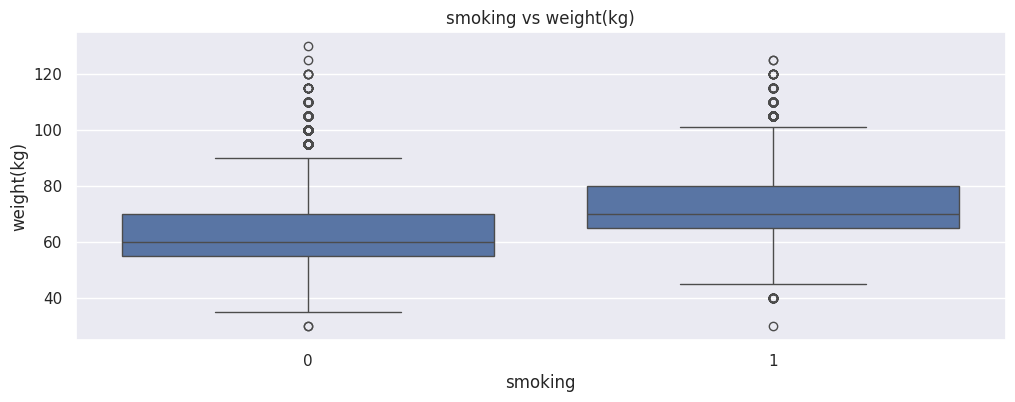

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


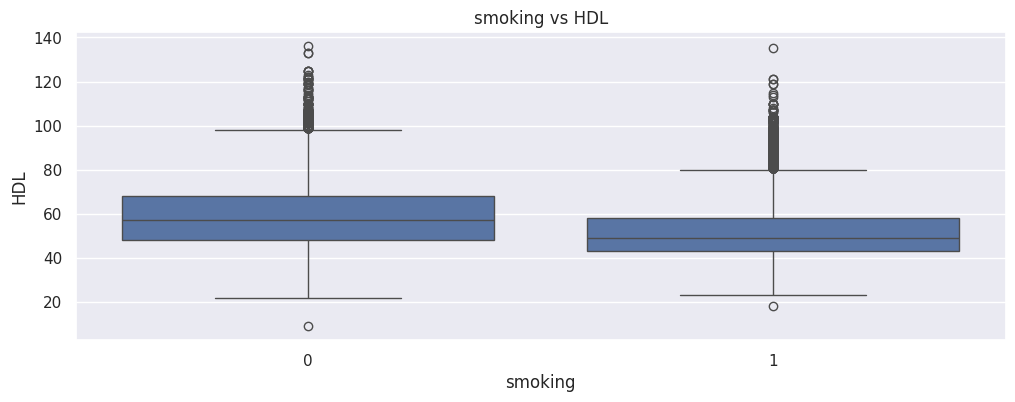

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


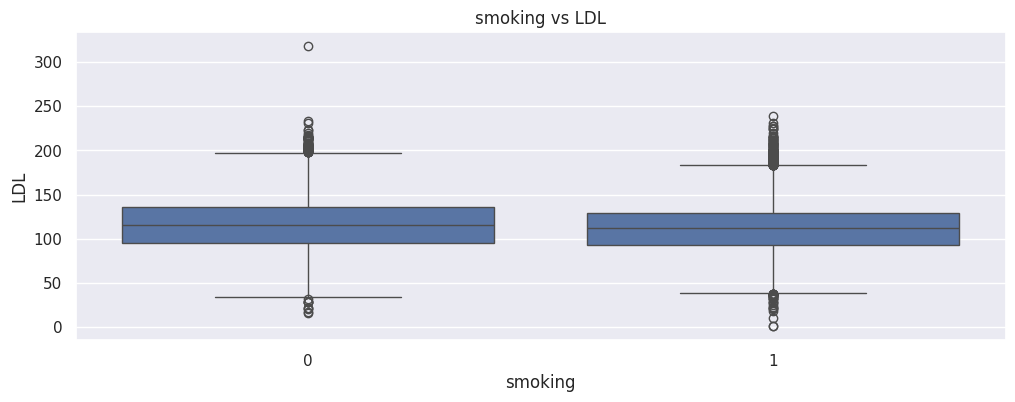

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


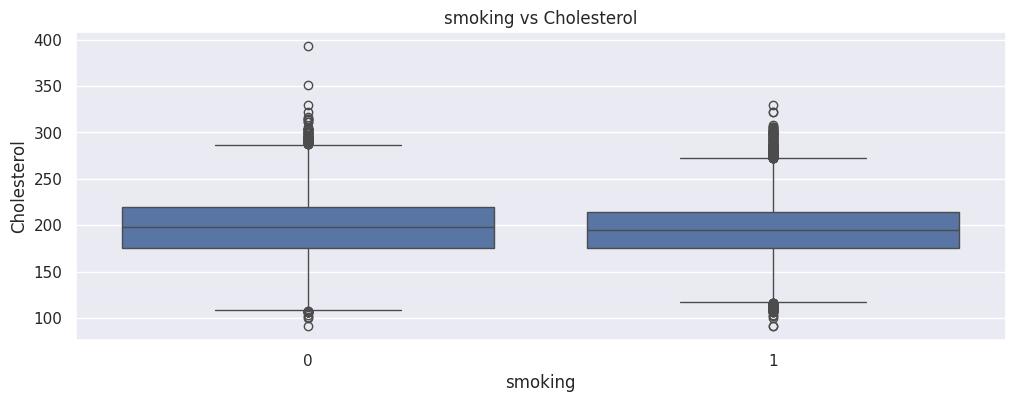

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


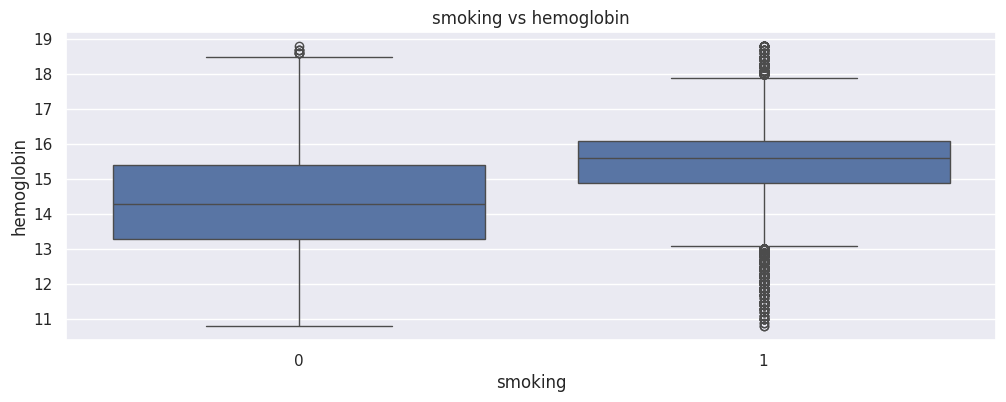

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


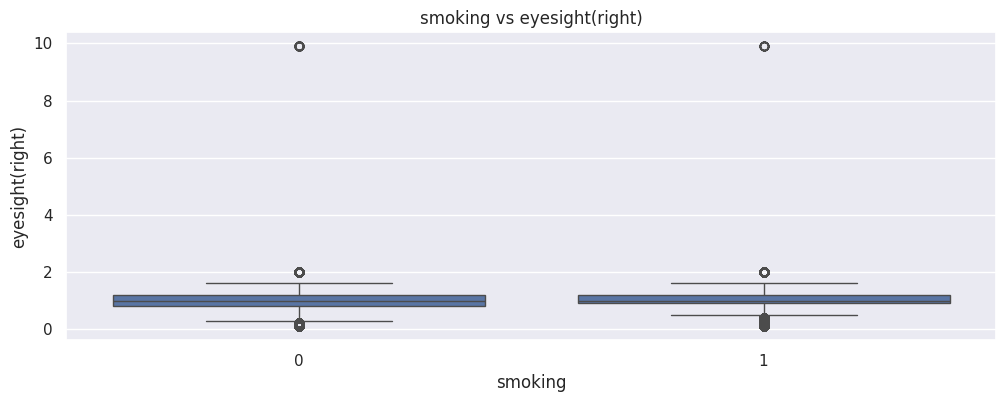

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


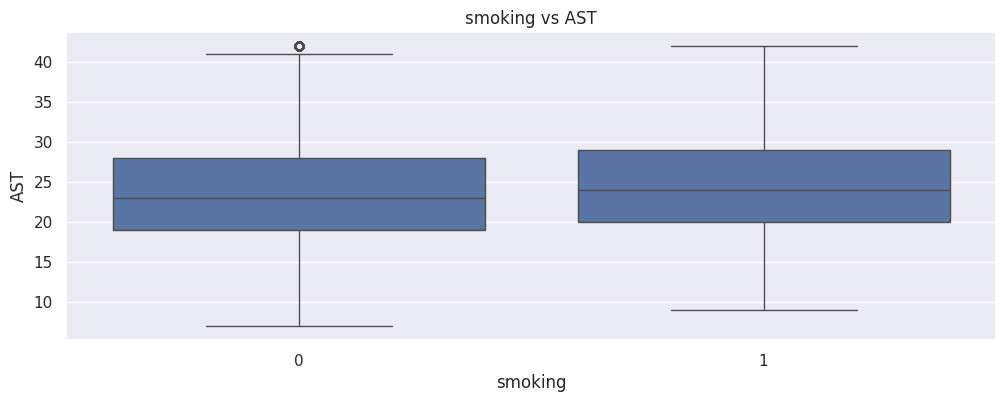

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


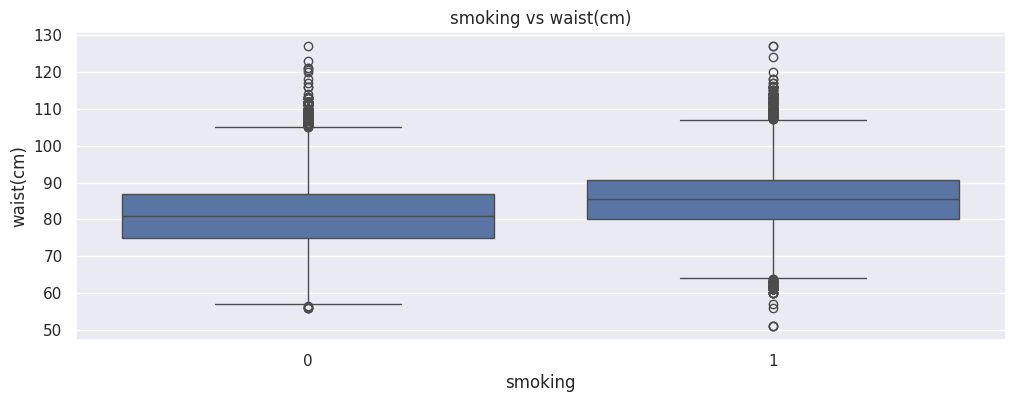

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


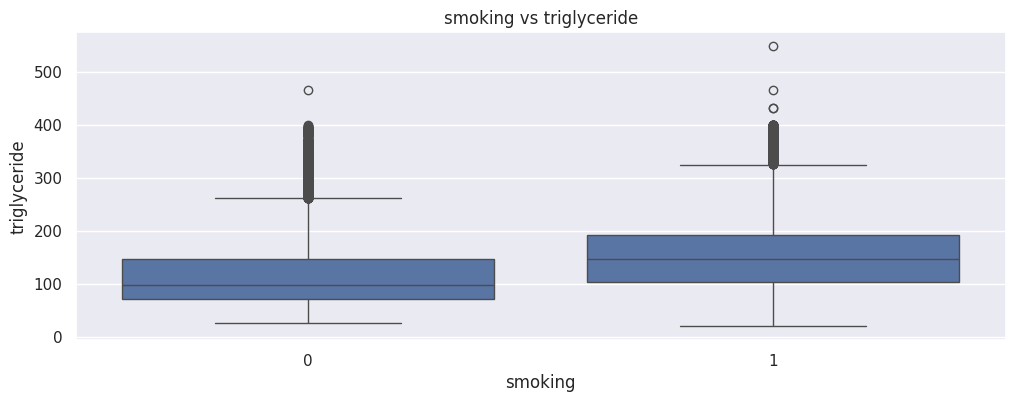

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


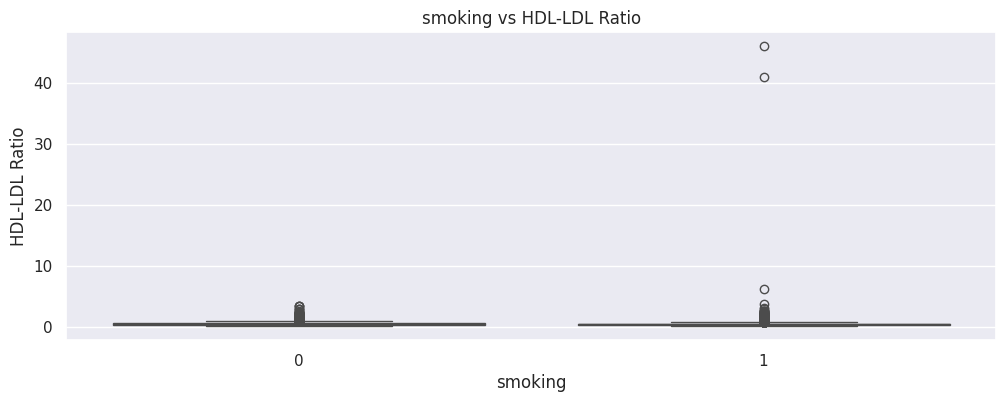

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


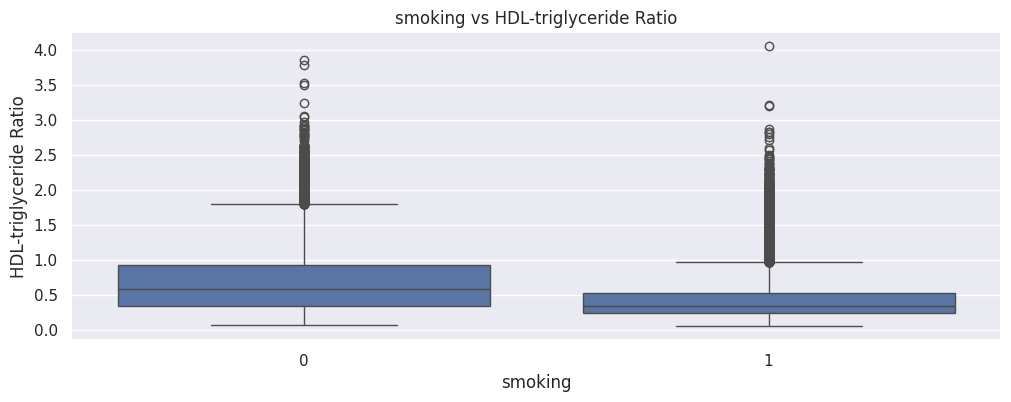

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


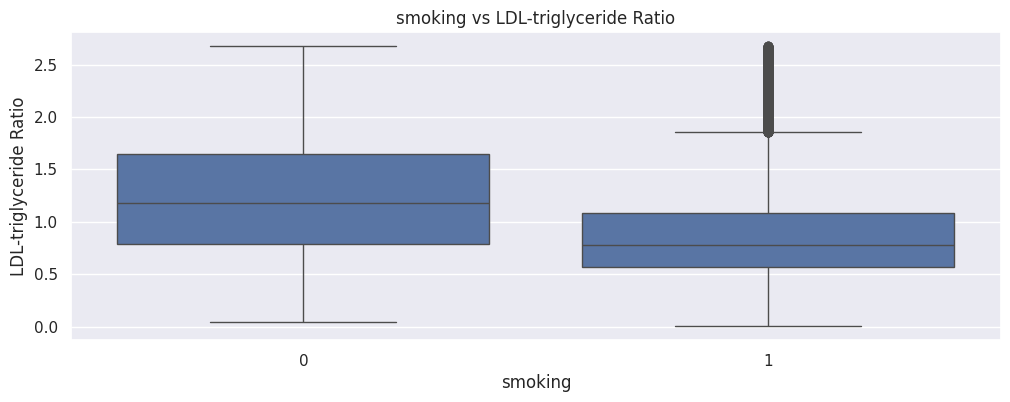

In [34]:
for i,feat in enumerate(x):
    plt.figure(figsize=(12,4))
    sns.boxplot(data=train_data, x='smoking', y=feat)
    plt.title('smoking vs ' + feat)
    plt.show()

In [35]:
# Final training data

train_data.to_csv("data_no_outliers.csv", index=None)


Data Normalization

z-score normalization for roughly gaussian data

log normalization for right skewed data

In [36]:
skew_data = ["HDL",'LDL','eyesight(right)','AST','triglyceride'
           ,"HDL-LDL Ratio","HDL-triglyceride Ratio","LDL-triglyceride Ratio"]

norm_data = ["weight(kg)", "Cholesterol","hemoglobin","waist(cm)"]

In [37]:
train_data[skew_data] = np.log(train_data[skew_data])

In [38]:
s = StandardScaler()
train_data[norm_data]=s.fit_transform(train_data[norm_data])

In [43]:
train_data

,weight(kg),HDL,LDL,Cholesterol,hemoglobin,eyesight(right),AST,waist(cm),triglyceride,smoking,HDL-LDL Ratio,HDL-triglyceride Ratio,LDL-triglyceride Ratio
0,0.211444,3.713572,4.532599,-0.830720,-0.118853,-0.223144,3.178054,-0.000376,5.247024,1,-0.819027,-1.533452,-0.714425
1,-0.597859,4.343805,4.753590,0.328062,-0.118853,0.182322,3.526361,-0.823383,4.077537,1,-0.409785,0.266268,0.676053
2,-1.407161,4.127134,4.553877,-0.339116,-1.170555,-0.356675,2.833213,-2.195063,4.976734,1,-0.426743,-0.849599,-0.422857
3,-1.002510,4.110874,4.553877,-1.006293,-1.471041,0.000000,3.637586,-0.823383,4.077537,0,-0.443003,0.033336,0.476339
4,-1.002510,3.828641,4.644391,-0.865835,-0.644704,0.000000,3.218876,-0.937690,4.700480,0,-0.815750,-0.871839,-0.056089
...,...,...,...,...,...,...,...,...,...,...,...,...,...
111474,1.020746,3.737670,4.962845,1.030354,0.331877,0.182322,3.713572,0.548296,5.318120,1,-1.225175,-1.580450,-0.355275
111475,-0.193208,3.871201,4.499810,-0.936064,0.782606,0.182322,3.178054,-0.480464,5.049856,1,-0.628609,-1.178655,-0.550046
111476,-0.597859,4.304065,4.304065,-1.041408,-0.794947,0.000000,3.044522,-0.251850,4.532599,1,0.000000,-0.228534,-0.228534
111477,1.425397,3.737670,4.753590,-0.725376,0.106512,0.405465,3.496508,1.577055,4.454347,0,-1.015921,-0.716678,0.299243


In [42]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 101819 entries, 0 to 111478
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   weight(kg)              101819 non-null  float64
 1   HDL                     101819 non-null  float64
 2   LDL                     101819 non-null  float64
 3   Cholesterol             101819 non-null  float64
 4   hemoglobin              101819 non-null  float64
 5   eyesight(right)         101819 non-null  float64
 6   AST                     101819 non-null  float64
 7   waist(cm)               101819 non-null  float64
 8   triglyceride            101819 non-null  float64
 9   smoking                 101819 non-null  int64  
 10  HDL-LDL Ratio           101819 non-null  float64
 11  HDL-triglyceride Ratio  101819 non-null  float64
 12  LDL-triglyceride Ratio  101819 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 10.9 MB


In [40]:
x = train_data.drop("smoking", axis=1)

array([[<Axes: title={'center': 'weight(kg)'}>,
        <Axes: title={'center': 'HDL'}>, <Axes: title={'center': 'LDL'}>],
       [<Axes: title={'center': 'Cholesterol'}>,
        <Axes: title={'center': 'hemoglobin'}>,
        <Axes: title={'center': 'eyesight(right)'}>],
       [<Axes: title={'center': 'AST'}>,
        <Axes: title={'center': 'waist(cm)'}>,
        <Axes: title={'center': 'triglyceride'}>],
       [<Axes: title={'center': 'HDL-LDL Ratio'}>,
        <Axes: title={'center': 'HDL-triglyceride Ratio'}>,
        <Axes: title={'center': 'LDL-triglyceride Ratio'}>]], dtype=object)

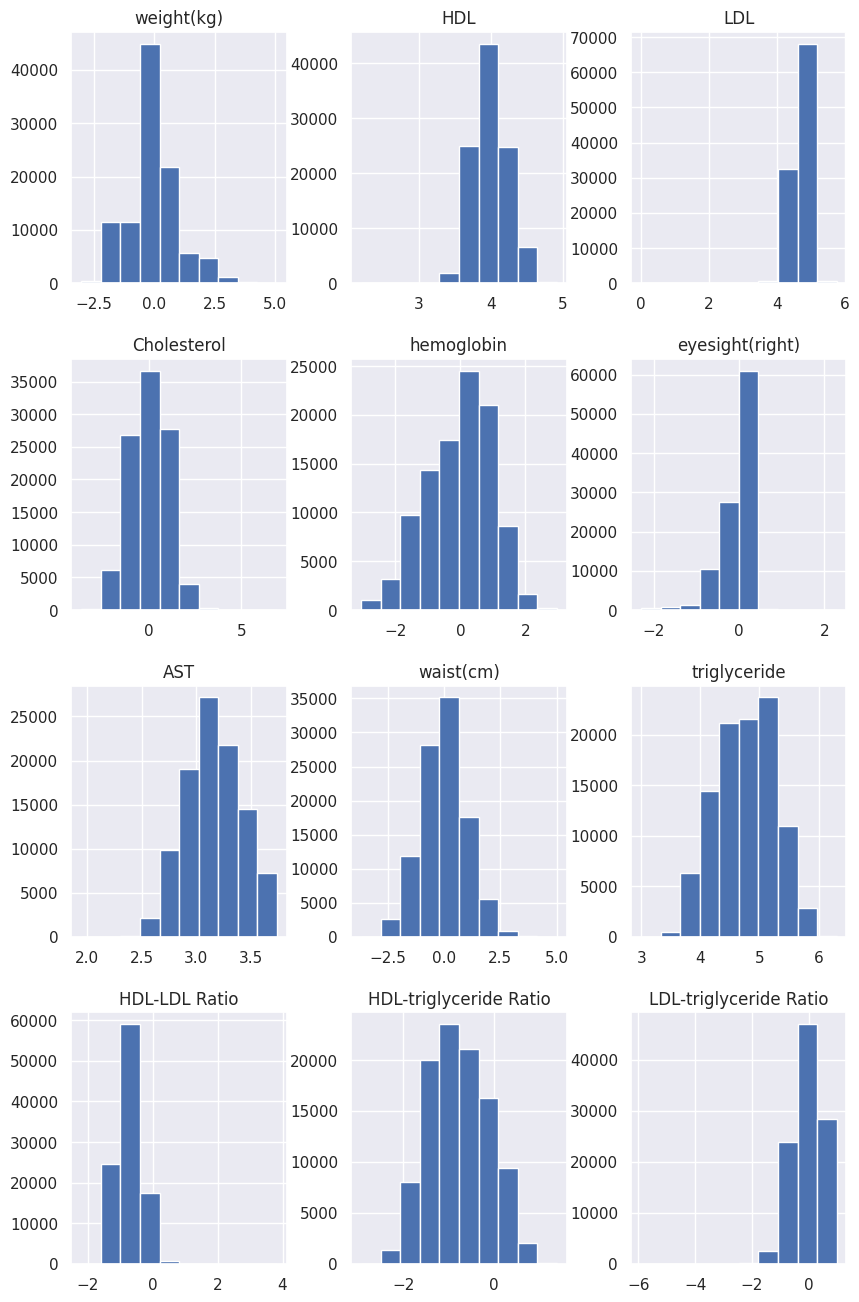

In [41]:
sns.set(rc={'figure.figsize':(10,16)})
x.hist()